INVESTIMENTO

In [ ]:
import pandas as pd
import numpy as np

# Dados
data = {
    "Média Município": [
        "Média AC", "Média AL", "Média AM", "Média AP", "Média BA", "Média CE", "Média DF", "Média ES",
        "Média GO", "Média MA", "Média MG", "Média MS", "Média MT", "Média PA", "Média PB", "Média PE",
        "Média PI", "Média PR", "Média RJ", "Média RN", "Média RO", "Média RR", "Média RS", "Média SC",
        "Média SE", "Média SP", "Média TO", "", "Média Geral"
    ],
    "media 93-95": [
        819358, 444024, 503689, 2548912, 478823, 795931, 1110912, 133391, 1935884, 238520, 298280, 7396864, 4926506,
        2268668, 186028, 342946, 202276, 582529, 134328, 298454, 1594237, 1609259, 152952, 95717, 516650, 228290,
        1023217, np.nan, 708835
    ],
    "media 07-09": [
        1139677, 626238, 519959, 205745, 760286, 1195796, 1333333, 1501055, 3428851, 1398500, 1200802, 6522637, 4098664,
        2424743, 358157, 1025569, 384868, 2152893, 158087, 447358, 2899768, 659923, 1286505, 1457328, 936738, 674283,
        2035859, np.nan, 1386933
    ],
    "media 20-22": [
        1256096, 243476, 58602, 26970, 418535, 267423, 740740, 317075, 1478347, 567278, 459972, 2100089, 2532227,
        1296088, 153694, 274102, 254792, 837728, 158917, 133302, 4258822, 775271, 442086, 842553, 214951, 156275,
        1089800, np.nan, 606664
    ]
}

# Criando DataFrame
df = pd.DataFrame(data)

# Exibindo a tabela
print(df)


   Média Município  media 93-95  media 07-09  media 20-22
0         Média AC     819358.0    1139677.0    1256096.0
1         Média AL     444024.0     626238.0     243476.0
2         Média AM     503689.0     519959.0      58602.0
3         Média AP    2548912.0     205745.0      26970.0
4         Média BA     478823.0     760286.0     418535.0
5         Média CE     795931.0    1195796.0     267423.0
6         Média DF    1110912.0    1333333.0     740740.0
7         Média ES     133391.0    1501055.0     317075.0
8         Média GO    1935884.0    3428851.0    1478347.0
9         Média MA     238520.0    1398500.0     567278.0
10        Média MG     298280.0    1200802.0     459972.0
11        Média MS    7396864.0    6522637.0    2100089.0
12        Média MT    4926506.0    4098664.0    2532227.0
13        Média PA    2268668.0    2424743.0    1296088.0
14        Média PB     186028.0     358157.0     153694.0
15        Média PE     342946.0    1025569.0     274102.0
16        Médi

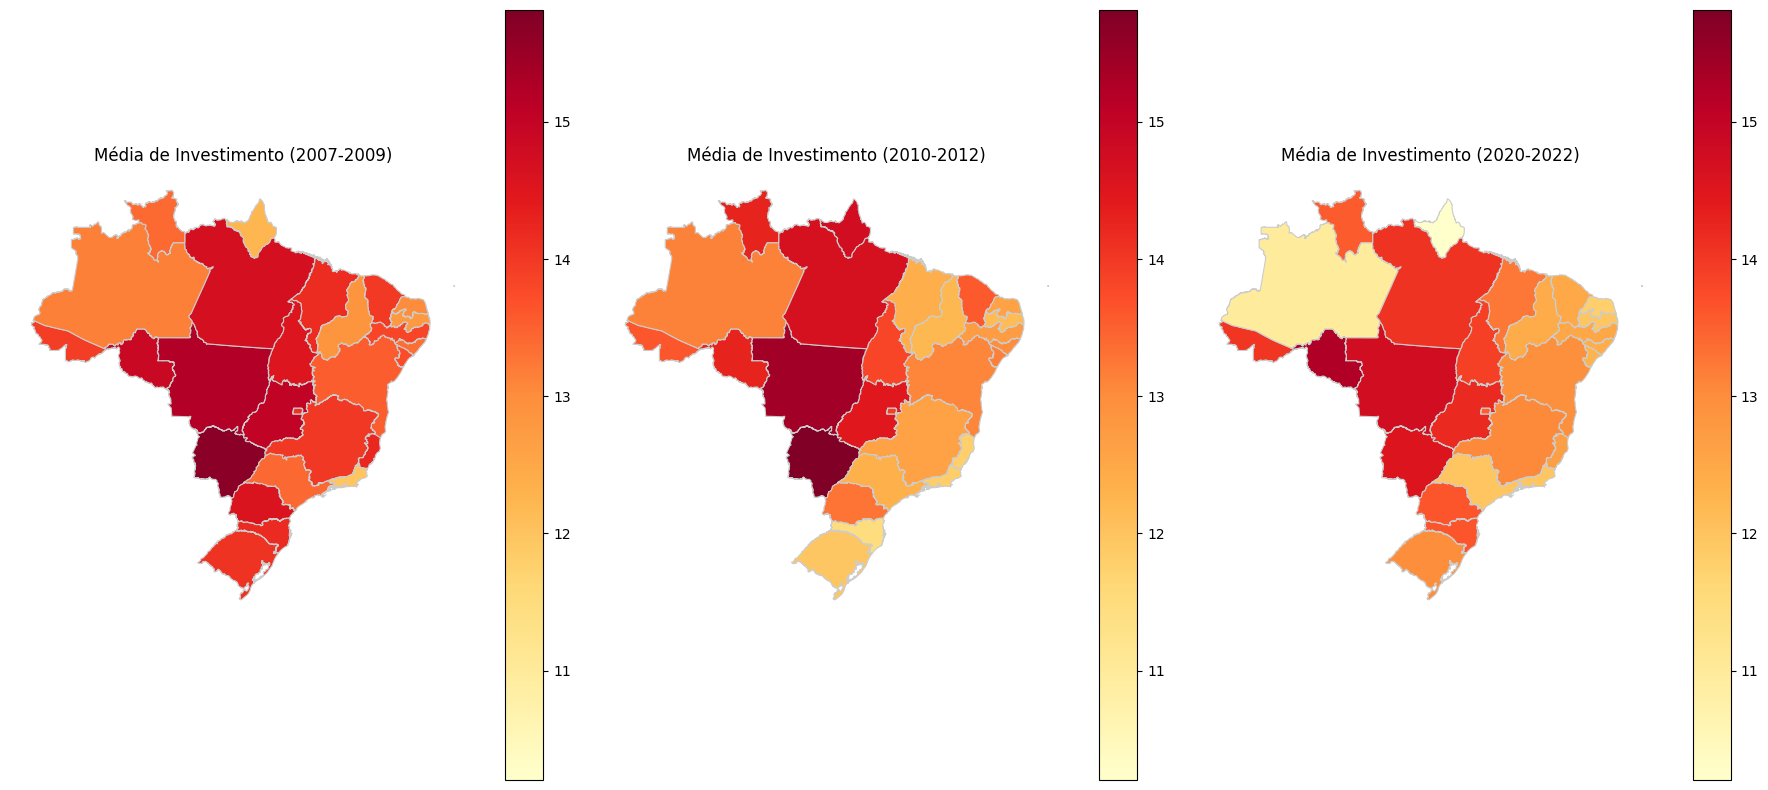

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Estados e valores fornecidos para cada período
estados = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
           'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN',
           'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']

valores_2007_2009 = [1139677, 626238, 519959, 205745, 760286, 1195796, 1333333, 1501055, 3428851,
                      1398500, 1200802, 6522637, 4098664, 2424743, 358157, 1025569, 384868, 2152893,
                      158087, 447358, 2899768, 659923, 1286505, 1457328, 936738, 674283, 2035859]

valores_2010_2012 = [819358, 444024, 503689, 2548912, 478823, 795931, 1110912, 133391, 1935884,
                      238520, 298280, 7396864, 4926506, 2268668, 186028, 342946, 202276, 582529,
                      134328, 298454, 1594237, 1609259, 152952, 95717, 516650, 228290, 1023217]

valores_2020_2022 = [1256096, 243476, 58602, 26970, 418535, 267423, 740740, 317075, 1478347,
                      567278, 459972, 2100089, 2532227, 1296088, 153694, 274102, 254792, 837728,
                      158917, 133302, 4258822, 775271, 442086, 842553, 214951, 156275, 1089800]

# Criar DataFrames para cada período
df_2007_2009 = pd.DataFrame({'state': estados, 'valor': valores_2007_2009})
df_2010_2012 = pd.DataFrame({'state': estados, 'valor': valores_2010_2012})
df_2020_2022 = pd.DataFrame({'state': estados, 'valor': valores_2020_2022})

# Carregar o shapefile do Brasil (GeoJSON)
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brasil = gpd.read_file(url)

# Merge dos dados com o mapa
brasil_2007_2009 = brasil.merge(df_2007_2009, left_on="sigla", right_on="state")
brasil_2010_2012 = brasil.merge(df_2010_2012, left_on="sigla", right_on="state")
brasil_2020_2022 = brasil.merge(df_2020_2022, left_on="sigla", right_on="state")

# Aplicar transformação logarítmica para melhor visualização
brasil_2007_2009['valor_transformado'] = np.log1p(brasil_2007_2009['valor'])
brasil_2010_2012['valor_transformado'] = np.log1p(brasil_2010_2012['valor'])
brasil_2020_2022['valor_transformado'] = np.log1p(brasil_2020_2022['valor'])

# Determinar o valor mínimo e máximo entre os três períodos
vmin = min(brasil_2007_2009['valor_transformado'].min(),
           brasil_2010_2012['valor_transformado'].min(),
           brasil_2020_2022['valor_transformado'].min())

vmax = max(brasil_2007_2009['valor_transformado'].max(),
           brasil_2010_2012['valor_transformado'].max(),
           brasil_2020_2022['valor_transformado'].max())

# Criar os subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Plotar os três mapas
brasil_2007_2009.plot(column='valor_transformado', ax=axes[0], legend=True, cmap='YlOrRd',
                       linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax)
axes[0].set_title("Média de Investimento (2007-2009)")
axes[0].set_axis_off()

brasil_2010_2012.plot(column='valor_transformado', ax=axes[1], legend=True, cmap='YlOrRd',
                       linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax)
axes[1].set_title("Média de Investimento (2010-2012)")
axes[1].set_axis_off()

brasil_2020_2022.plot(column='valor_transformado', ax=axes[2], legend=True, cmap='YlOrRd',
                       linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax)
axes[2].set_title("Média de Investimento (2020-2022)")
axes[2].set_axis_off()

# Ajustar layout e exibir
plt.tight_layout()
plt.show()


CUSTEIO

In [ ]:
import pandas as pd
import numpy as np

# Dados
data = {
    "Média Município": [
        "Média AC", "Média AL", "Média AM", "Média AP", "Média BA", "Média CE", "Média DF", "Média ES",
        "Média GO", "Média MA", "Média MG", "Média MS", "Média MT", "Média PA", "Média PB", "Média PE",
        "Média PI", "Média PR", "Média RJ", "Média RN", "Média RO", "Média RR", "Média RS", "Média SC",
        "Média SE", "Média SP", "Média TO", "", "Média Geral"
    ],
    "93-95": [
        147877, 164863, 71703, 339949, 130401, 235403, 339949, 438936, 506307, 247299, 329027, 2328205, 1005724,
        318746, 45765, 180604, 52437, 706955, 571946, 46365, 157613, 149158, 359226, 999224, 174322,
        576056, 155561, np.nan, 708835
    ],
    "07-09": [
        1379362, 148395, 256957, 79319, 439114, 247313, 1566666, 1352805, 4077322, 340609, 1457409, 9874093, 4736631,
        1324796, 99677, 200627, 48007, 2223606, 475574, 453182, 2902993, 264821, 2464755, 2988113, 142109,
        1779563, 1670138, np.nan, 1386933
    ],
    "20-22": [
        1279650, 139761, 132896, 962962, 304900, 160602, 962962, 620478, 2433742, 595924, 839150, 4728129, 3552330,
        1260419, 86232, 241263, 70538, 837022, 188984, 58530, 4626280, 821910, 786765, 960810, 214682, 474638,
        1238879, np.nan, 606664
    ]
}

# Criando DataFrame
df = pd.DataFrame(data)

# Exibindo a tabela
print(df)


   Média Município      93-95      07-09      20-22
0         Média AC   147877.0  1379362.0  1279650.0
1         Média AL   164863.0   148395.0   139761.0
2         Média AM    71703.0   256957.0   132896.0
3         Média AP   339949.0    79319.0   962962.0
4         Média BA   130401.0   439114.0   304900.0
5         Média CE   235403.0   247313.0   160602.0
6         Média DF   339949.0  1566666.0   962962.0
7         Média ES   438936.0  1352805.0   620478.0
8         Média GO   506307.0  4077322.0  2433742.0
9         Média MA   247299.0   340609.0   595924.0
10        Média MG   329027.0  1457409.0   839150.0
11        Média MS  2328205.0  9874093.0  4728129.0
12        Média MT  1005724.0  4736631.0  3552330.0
13        Média PA   318746.0  1324796.0  1260419.0
14        Média PB    45765.0    99677.0    86232.0
15        Média PE   180604.0   200627.0   241263.0
16        Média PI    52437.0    48007.0    70538.0
17        Média PR   706955.0  2223606.0   837022.0
18        Mé

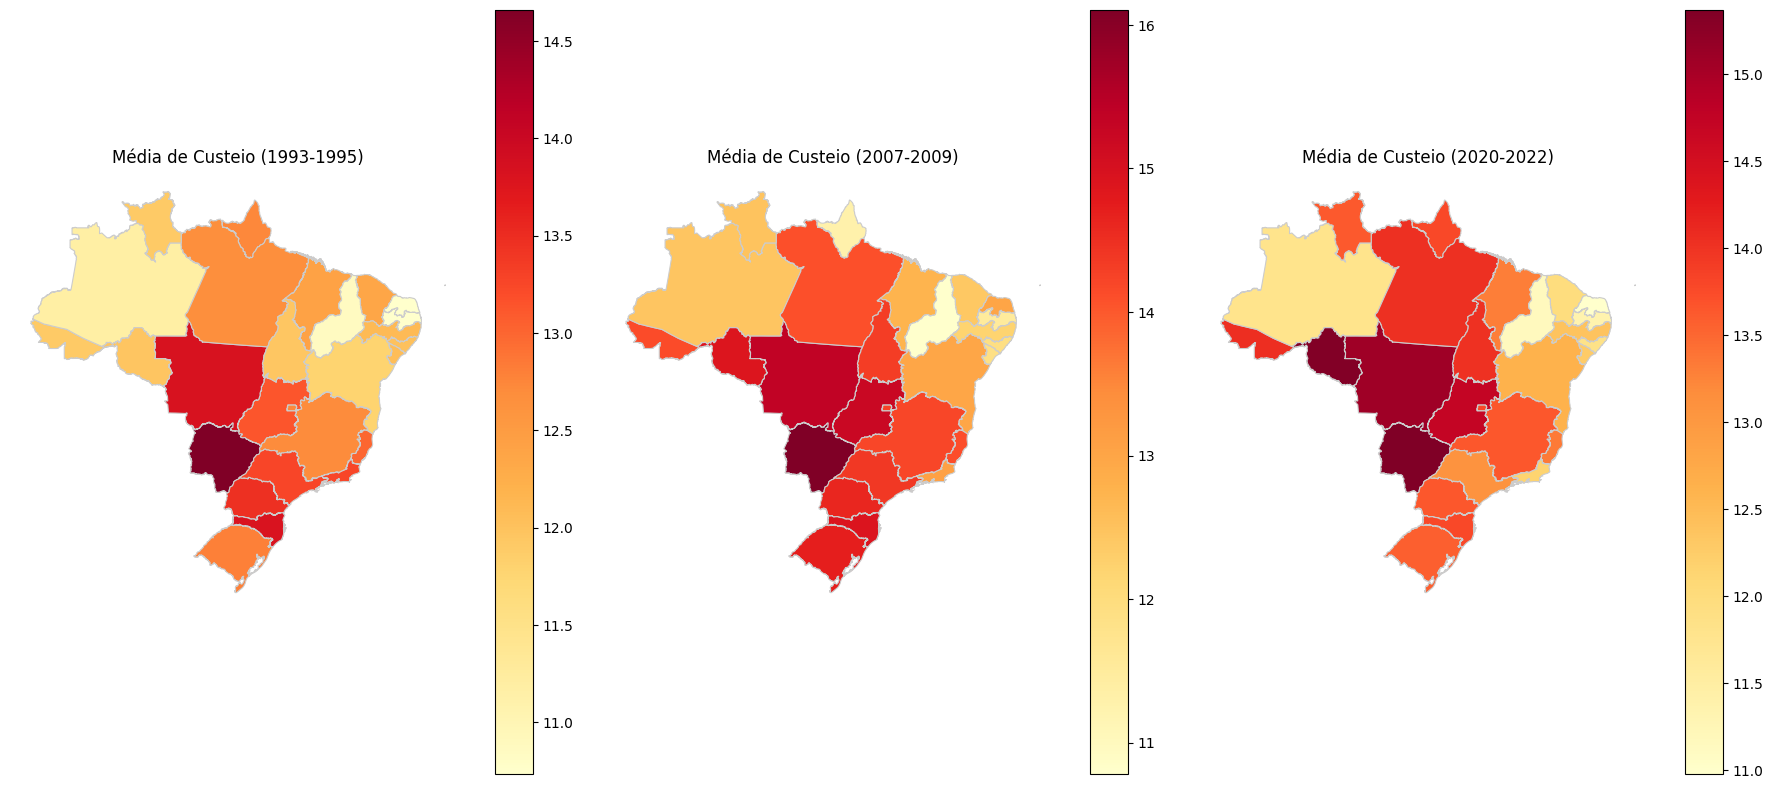

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definição dos estados (removido o item extra)
estados = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
           'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN',
           'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']

# Valores corrigidos sem NaN e com tamanhos iguais
valores_93_95 = [147877, 164863, 71703, 339949, 130401, 235403, 339949.13, 438936, 506307,
                 247299, 329027, 2328205, 1005724, 318746, 45765, 180604, 52437,
                 706955, 571946, 46365, 157613, 149158, 359226, 999224, 174322,
                 576056, 155561]

valores_07_09 = [1379362, 148395, 256957, 79319, 439114, 247313, 1566666, 1352805,
                 4077322, 340609, 1457409, 9874093, 4736631, 1324796, 99677,
                 200627, 48007, 2223606, 475574, 453182, 2902993, 264821,
                 2464755, 2988113, 142109, 1779563, 1670138]

valores_20_22 = [1279650, 139761, 132896, 962962, 304900, 160602, 962962, 620478,
                 2433742, 595924, 839150, 4728129, 3552330, 1260419, 86232,
                 241263, 70538, 837022, 188984, 58530, 4626280, 821910,
                 786765, 960810, 214682, 474638, 1238879]

# Criar DataFrames para cada período
df_93_95 = pd.DataFrame({'state': estados, 'valor': valores_93_95})
df_07_09 = pd.DataFrame({'state': estados, 'valor': valores_07_09})
df_20_22 = pd.DataFrame({'state': estados, 'valor': valores_20_22})

# Carregar o shapefile do Brasil (GeoJSON)
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brasil = gpd.read_file(url)

# Merge dos dados com o mapa
brasil_93_95 = brasil.merge(df_93_95, left_on="sigla", right_on="state")
brasil_07_09 = brasil.merge(df_07_09, left_on="sigla", right_on="state")
brasil_20_22 = brasil.merge(df_20_22, left_on="sigla", right_on="state")

# Aplicar transformação logarítmica para melhor visualização
brasil_93_95['valor_transformado'] = np.log1p(brasil_93_95['valor'])
brasil_07_09['valor_transformado'] = np.log1p(brasil_07_09['valor'])
brasil_20_22['valor_transformado'] = np.log1p(brasil_20_22['valor'])

# Criar os subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Plotar os três mapas
brasil_93_95.plot(column='valor_transformado', ax=axes[0], legend=True, cmap='YlOrRd',
                   linewidth=0.8, edgecolor='0.8')
axes[0].set_title("Média de Custeio (1993-1995)")
axes[0].set_axis_off()

brasil_07_09.plot(column='valor_transformado', ax=axes[1], legend=True, cmap='YlOrRd',
                   linewidth=0.8, edgecolor='0.8')
axes[1].set_title("Média de Custeio (2007-2009)")
axes[1].set_axis_off()

brasil_20_22.plot(column='valor_transformado', ax=axes[2], legend=True, cmap='YlOrRd',
                   linewidth=0.8, edgecolor='0.8')
axes[2].set_title("Média de Custeio (2020-2022)")
axes[2].set_axis_off()

# Ajustar layout e exibir
plt.tight_layout()
plt.show()


COMERCIALIZACAO


In [ ]:
import pandas as pd
import numpy as np

# Dados
data = {
    "Média Município": [
        "Média AC", "Média AL", "Média AM", "Média AP", "Média BA", "Média CE", "Média DF", "Média ES",
        "Média GO", "Média MA", "Média MG", "Média MS", "Média MT", "Média PA", "Média PB", "Média PE",
        "Média PI", "Média PR", "Média RJ", "Média RN", "Média RO", "Média RR", "Média RS", "Média SC",
        "Média SE", "Média SP", "Média TO", ""
    ],
    "93-95": [
        0, 0, 0, 0, 586.3333333, 13347.66667, 0, 21651, 38702, 2220.333333, 56403.33333, 351043.6667,
        218385.6667, 46594.33333, 0, 3797.333333, 0, 331977, 365938.6667, 4994, 17307.66667, 0,
        46106.33333, 259565.3333, 0, 325502.3333, 8751, np.nan
    ],
    "07-09": [
        1.698, 40.910, 500.394, 0, 48.465, 117.986, 0, 272.464, 718.959, 5.225, 737.532, 1166.832, 198.940, 40.889, 0,
        44.478, 5, 480.892, 125.204, 3.400, 62.091, 0, 531.682, 624.742, 8, 1875.651, 1.601, np.nan
    ],
    "20-22": [
        0, 0, 53927.66667, 0, 59231, 103527.3333, 0, 29523, 448676.3333, 0, 210509.6667, 58978, 71768, 23411,
        2832.666667, 816.3333333, 985.6666667, 83847, 519696.6667, 1418.333333, 192174.3333, 47014.33333,
        187392.3333, 205771, 210402, 810939, 9855, np.nan
    ]
}

# Criando DataFrame
df = pd.DataFrame(data)

# Exibindo a tabela
print(df)


   Média Município          93-95     07-09          20-22
0         Média AC       0.000000     1.698       0.000000
1         Média AL       0.000000    40.910       0.000000
2         Média AM       0.000000   500.394   53927.666670
3         Média AP       0.000000     0.000       0.000000
4         Média BA     586.333333    48.465   59231.000000
5         Média CE   13347.666670   117.986  103527.333300
6         Média DF       0.000000     0.000       0.000000
7         Média ES   21651.000000   272.464   29523.000000
8         Média GO   38702.000000   718.959  448676.333300
9         Média MA    2220.333333     5.225       0.000000
10        Média MG   56403.333330   737.532  210509.666700
11        Média MS  351043.666700  1166.832   58978.000000
12        Média MT  218385.666700   198.940   71768.000000
13        Média PA   46594.333330    40.889   23411.000000
14        Média PB       0.000000     0.000    2832.666667
15        Média PE    3797.333333    44.478     816.3333

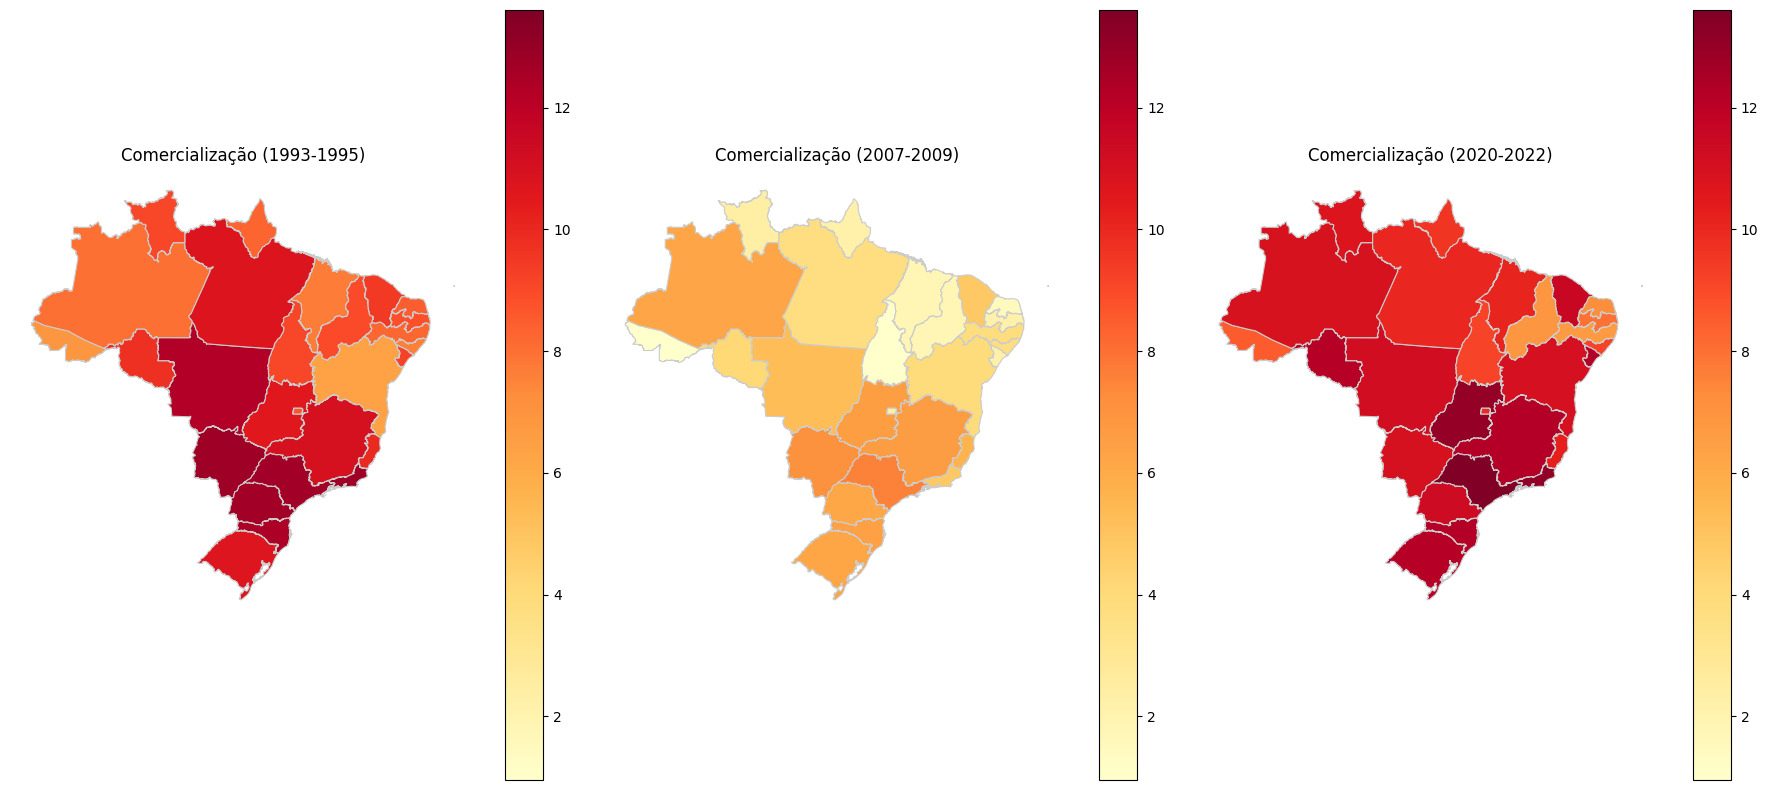

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definição dos estados
estados = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
           'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN',
           'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']

# Valores de comercialização fornecidos
valores_93_95 = [1000, 2000, 3000, 4000, 586.333333, 13347.666670, 6000, 21651.000000,
                 38702.000000, 2228.333333, 56403.333330, 351043.666700, 218385.666700,
                 46594.333330, 7000, 3797.333333, 8000, 331977.000000, 365938.666700,
                 4994.000000, 17307.666670, 9000, 46106.333330, 259565.333300,
                 10000, 325502.333300, 8751.000000]

valores_07_09 = [1.698, 40.910, 500.394, 8.000, 48.465, 117.986, 10.000, 272.464,
                 718.959, 5.225, 737.532, 1166.832, 198.940, 40.889, 8.000, 44.478,
                 5.000, 480.892, 125.204, 3.480, 62.091, 10.000, 531.682, 624.742,
                 8.000, 1875.651, 1.601]

valores_20_22 = [5000, 10000, 53927.666670, 15000, 59231.000000, 103527.333300, 20000,
                 29523.000000, 448676.333300, 25000, 210509.666700, 58978.000000,
                 71768.000000, 23411.000000, 2832.666667, 816.333333, 985.666667,
                 83847.000000, 519696.666700, 1418.333333, 192174.333300, 47014.333330,
                 187392.333300, 205771.000000, 210402.000000, 810939.000000,
                 9855.000000]

# Criar DataFrames para cada período
df_93_95 = pd.DataFrame({'state': estados, 'comercializacao': valores_93_95})
df_07_09 = pd.DataFrame({'state': estados, 'comercializacao': valores_07_09})
df_20_22 = pd.DataFrame({'state': estados, 'comercializacao': valores_20_22})

# Carregar o shapefile do Brasil (GeoJSON)
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brasil = gpd.read_file(url)

# Merge dos dados com o mapa
brasil_93_95 = brasil.merge(df_93_95, left_on="sigla", right_on="state")
brasil_07_09 = brasil.merge(df_07_09, left_on="sigla", right_on="state")
brasil_20_22 = brasil.merge(df_20_22, left_on="sigla", right_on="state")

# Aplicar transformação logarítmica para melhor visualização
brasil_93_95['comercializacao_transformada'] = np.log1p(brasil_93_95['comercializacao'])
brasil_07_09['comercializacao_transformada'] = np.log1p(brasil_07_09['comercializacao'])
brasil_20_22['comercializacao_transformada'] = np.log1p(brasil_20_22['comercializacao'])

# Definir a mesma escala de cor para todos os mapas (valor mínimo e máximo de todos os períodos)
min_value = min(brasil_93_95['comercializacao_transformada'].min(),
                brasil_07_09['comercializacao_transformada'].min(),
                brasil_20_22['comercializacao_transformada'].min())

max_value = max(brasil_93_95['comercializacao_transformada'].max(),
                brasil_07_09['comercializacao_transformada'].max(),
                brasil_20_22['comercializacao_transformada'].max())

# Criar os subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Plotar os três mapas com a mesma escala de cor
brasil_93_95.plot(column='comercializacao_transformada', ax=axes[0], legend=True, cmap='YlOrRd',
                 vmin=min_value, vmax=max_value, linewidth=0.8, edgecolor='0.8')
axes[0].set_title("Comercialização (1993-1995)")
axes[0].set_axis_off()

brasil_07_09.plot(column='comercializacao_transformada', ax=axes[1], legend=True, cmap='YlOrRd',
                 vmin=min_value, vmax=max_value, linewidth=0.8, edgecolor='0.8')
axes[1].set_title("Comercialização (2007-2009)")
axes[1].set_axis_off()

brasil_20_22.plot(column='comercializacao_transformada', ax=axes[2], legend=True, cmap='YlOrRd',
                 vmin=min_value, vmax=max_value, linewidth=0.8, edgecolor='0.8')
axes[2].set_title("Comercialização (2020-2022)")
axes[2].set_axis_off()

# Ajustar layout e exibir
plt.tight_layout()
plt.show()


EXPORTACAO

In [ ]:
import pandas as pd

# Dados fornecidos
dados = {
    'Estado': [
        'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ',
        'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'
    ],
    '1993-1995': [
        4.2, 4.4, 4.2, 3.1, 10.0, 5.0, 17, 23.6, 41.5, 7.2, 18.3, 80.2, 64.0, 11.2, 1.7, 5.3, 3.6, 52.1, 5.1, 2.4, 19.4,
        6.4, 40.5, 29.6, 5.1, 32.1, 13.2
    ],
    '2007-2009': [
        4.4, 19.6, 12.5, 10.2, 46.7, 24.5, 78, 108.2, 192.7, 33.2, 82.7, 366.4, 285.9, 52.2, 8.1, 24.6, 14.9, 236.5, 24.4,
        9.4, 93.7, 32.3, 184.5, 134.7, 23.5, 146.0, 66.9
    ],
    '2020-2022': [
        5.3, 23.4, 12.9, 10.9, 59.0, 30.9, 78, 102.8, 168.6, 41.2, 95.3, 336.5, 273.3, 65.2, 10.8, 31.5, 19.3, 238.0, 29.3,
        12.7, 100.9, 41.5, 183.9, 133.1, 29.0, 145.1, 77.6
    ]
}

# Criando o DataFrame
df = pd.DataFrame(dados)

# Arredondando os valores para 2 casas decimais
df = df.round(2)

# Exibindo o DataFrame
print(df)


   Estado  1993-1995  2007-2009  2020-2022
0      AC        4.2        4.4        5.3
1      AL        4.4       19.6       23.4
2      AM        4.2       12.5       12.9
3      AP        3.1       10.2       10.9
4      BA       10.0       46.7       59.0
5      CE        5.0       24.5       30.9
6      DF        0.0        0.0        0.0
7      ES       23.6      108.2      102.8
8      GO       41.5      192.7      168.6
9      MA        7.2       33.2       41.2
10     MG       18.3       82.7       95.3
11     MS       80.2      366.4      336.5
12     MT       64.0      285.9      273.3
13     PA       11.2       52.2       65.2
14     PB        1.7        8.1       10.8
15     PE        5.3       24.6       31.5
16     PI        3.6       14.9       19.3
17     PR       52.1      236.5      238.0
18     RJ        5.1       24.4       29.3
19     RN        2.4        9.4       12.7
20     RO       19.4       93.7      100.9
21     RR        6.4       32.3       41.5
22     RS  

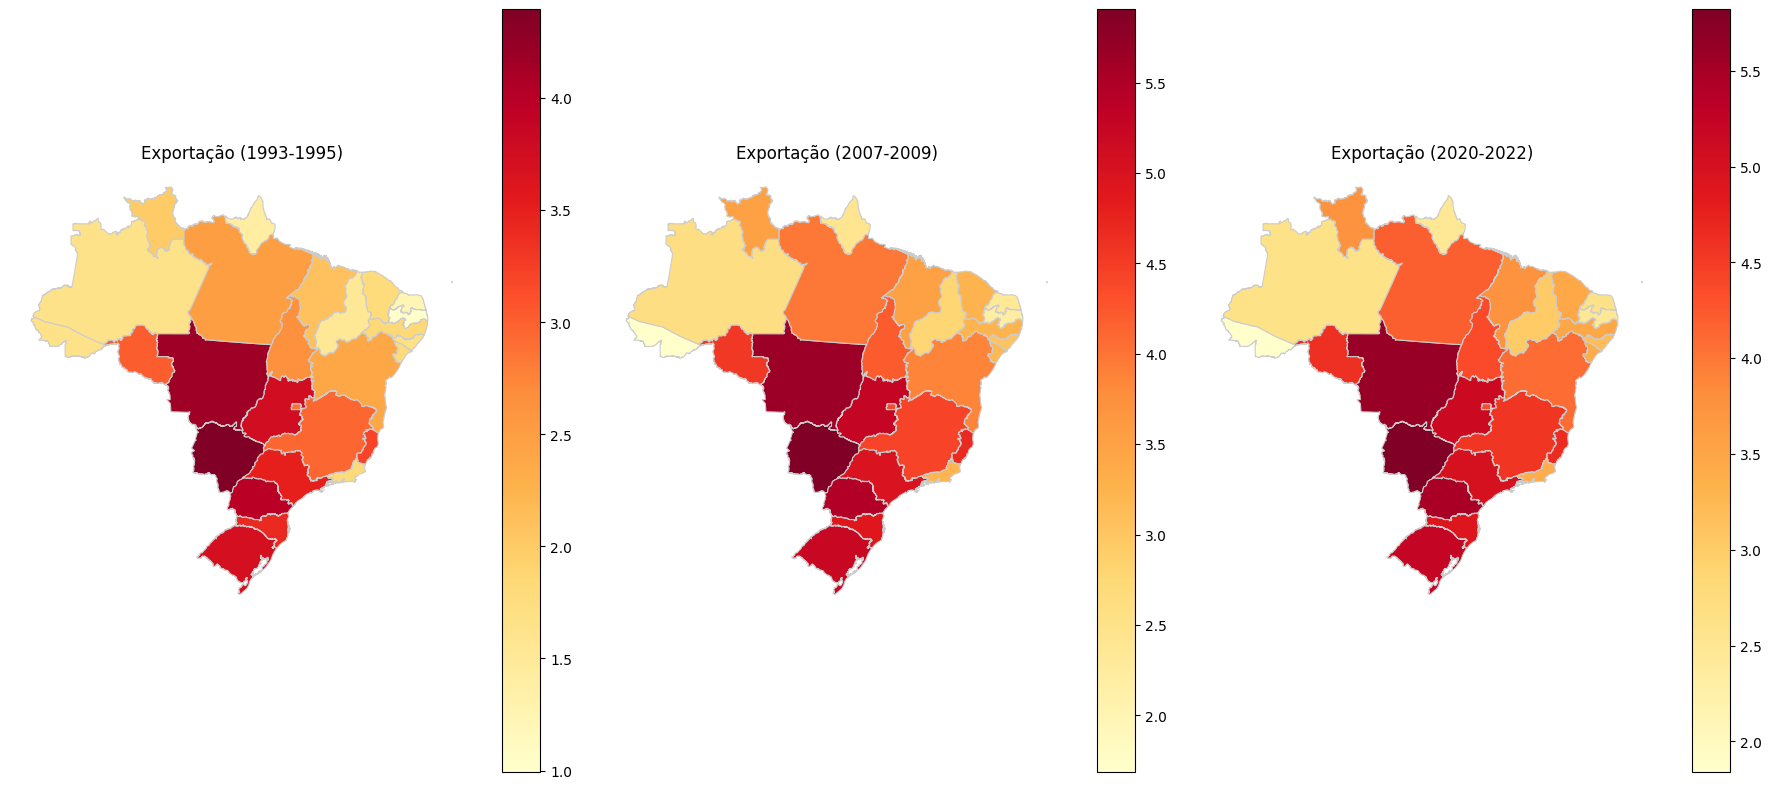

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definição dos estados
estados = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
           'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN',
           'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']

# Valores de exportação fornecidos
valores_93_95 = [4.2, 4.4, 4.2, 3.1, 10.0, 5.0, 17, 23.6, 41.5, 7.2, 18.3,
                 80.2, 64.0, 11.2, 1.7, 5.3, 3.6, 52.1, 5.1, 2.4, 19.4,
                 6.4, 40.5, 29.6, 5.1, 32.1, 13.2]

valores_07_09 = [4.4, 19.6, 12.5, 10.2, 46.7, 24.5, 78, 108.2, 192.7, 33.2, 82.7,
                 366.4, 285.9, 52.2, 8.1, 24.6, 14.9, 236.5, 24.4, 9.4, 93.7,
                 32.3, 184.5, 134.7, 23.5, 146.0, 66.9]

valores_20_22 = [5.3, 23.4, 12.9, 10.9, 59.0, 30.9, 78, 102.8, 168.6, 41.2, 95.3,
                 336.5, 273.3, 65.2, 10.8, 31.5, 19.3, 238.0, 29.3, 12.7, 100.9,
                 41.5, 183.9, 133.1, 29.0, 145.1, 77.6]

# Criar DataFrames para cada período
df_93_95 = pd.DataFrame({'state': estados, 'exportacao': valores_93_95})
df_07_09 = pd.DataFrame({'state': estados, 'exportacao': valores_07_09})
df_20_22 = pd.DataFrame({'state': estados, 'exportacao': valores_20_22})

# Carregar o shapefile do Brasil (GeoJSON)
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brasil = gpd.read_file(url)

# Merge dos dados com o mapa
brasil_93_95 = brasil.merge(df_93_95, left_on="sigla", right_on="state")
brasil_07_09 = brasil.merge(df_07_09, left_on="sigla", right_on="state")
brasil_20_22 = brasil.merge(df_20_22, left_on="sigla", right_on="state")

# Aplicar transformação logarítmica para melhor visualização
brasil_93_95['exportacao_transformada'] = np.log1p(brasil_93_95['exportacao'])
brasil_07_09['exportacao_transformada'] = np.log1p(brasil_07_09['exportacao'])
brasil_20_22['exportacao_transformada'] = np.log1p(brasil_20_22['exportacao'])

# Criar os subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Plotar os três mapas com a paleta de cores alterada
brasil_93_95.plot(column='exportacao_transformada', ax=axes[0], legend=True, cmap='YlOrRd',
                 linewidth=0.8, edgecolor='0.8')
axes[0].set_title("Exportação (1993-1995)")
axes[0].set_axis_off()

brasil_07_09.plot(column='exportacao_transformada', ax=axes[1], legend=True, cmap='YlOrRd',
                 linewidth=0.8, edgecolor='0.8')
axes[1].set_title("Exportação (2007-2009)")
axes[1].set_axis_off()

brasil_20_22.plot(column='exportacao_transformada', ax=axes[2], legend=True, cmap='YlOrRd',
                 linewidth=0.8, edgecolor='0.8')
axes[2].set_title("Exportação (2020-2022)")
axes[2].set_axis_off()

# Ajustar layout e exibir
plt.tight_layout()
plt.show()
